In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, sin
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from copy import copy
%matplotlib inline

## Ex 1

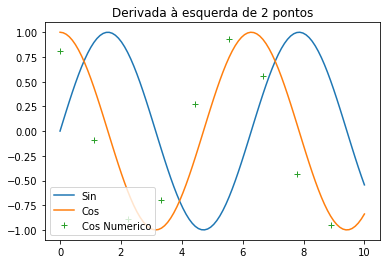

In [4]:
from numpy import sin, cos

# Calcular derivada do sin à la pata
x = np.linspace(0,10, num=100)
plt.plot(x, sin(x), label='Sin')
plt.plot(x, cos(x), label='Cos')

N = 10
x = np.linspace(0,10, num=N)

delta = x[1] - x[0]


y_cos = []
y_sin = sin(x)
for i in range(len(y_sin)-1):
    y_cos.append((y_sin[i+1]-y_sin[i])/delta)


plt.plot(x[:-1], y_cos, '+', label='Cos Numerico')
plt.title('Derivada à esquerda de 2 pontos')
plt.legend()
plt.show()

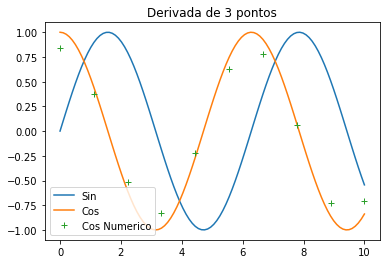

In [5]:
x = np.linspace(0,10, num=100)
plt.plot(x, sin(x), label='Sin')
plt.plot(x, cos(x), label='Cos')

N = 10
x = np.linspace(0,10, num=N)
delta = 10/N

y_cos = []
for i in x:
    d = (sin(i+delta) - sin(i-delta))/(2*delta)
    y_cos.append(d)


plt.plot(x, y_cos, '+', label='Cos Numerico')
plt.title('Derivada de 3 pontos')
plt.legend()
plt.show()

## Ex 2

In [6]:
import pandas as pd 

data = pd.read_csv("ficha5_data1.txt", lineterminator="\n", sep="	", names=['T', 'X'], header=None)
data = np.array(data).T

In [7]:
from numpy import diff
T = data[0]
X = data[1]

dydx = diff(X) / diff(T)

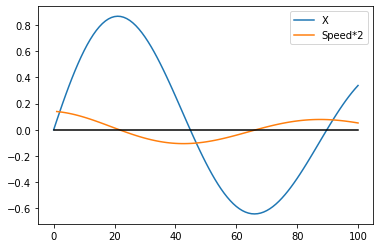

In [8]:
plt.plot(T, X, label="X")
plt.plot(T[1:], dydx*2, label="Speed*2")
plt.plot(T, X*0, 'black')
plt.legend()

## Ex 3
ha um desfasamento qqr nos n's


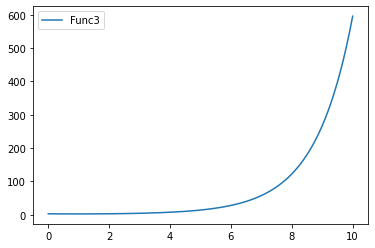

In [9]:
def func3(x):
    return 3*np.exp(x) / (x**2+x+1)

# Plot func3
x = np.linspace(0,10, num=100)
plt.plot(x, func3(x), label='Func3')
plt.legend()
plt.show()

In [17]:
# calculate the taylor series of any function
from scipy.misc import derivative

def taylor(f, x0, n):
    taylor = []
    for i in range(n):
        taylor.append(derivative(f, x0, dx=1e-3, n=i, order=n+3)/np.math.factorial(i))
    return taylor

def taylor_poly(f, x, x0, n):
    coef = taylor(f, x0, n)
    
    retorno = 0
    for i,c in enumerate(coef):
        retorno += c*(x-x0)**i

    return retorno

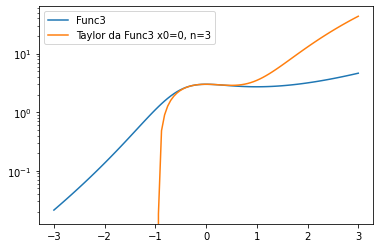

In [18]:
# Plot func3
x = np.linspace(-3,3, num=100)
plt.plot(x, func3(x), label='Func3')
plt.plot(x, [taylor_poly(func3, i, x0=0, n=4) for i in x], label='Taylor da Func3 x0=0, n=3')
plt.yscale('log')
plt.legend()
plt.show()

## Ex 4

In [10]:
from numpy import loadtxt

data = loadtxt("ficha5_data2.txt")
data.shape

(512, 1024)

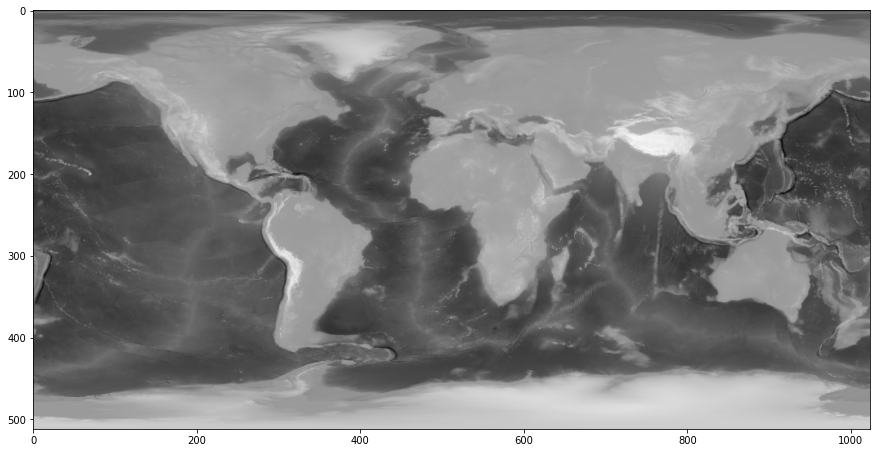

In [11]:
# Plot data as an image
plt.figure(figsize=(15,15))
plt.imshow(data, cmap='gray')
plt.show()

In [12]:
h = 3000 # Reduzi h para maior contraste
phi = 3*np.pi/4

gradient_x = np.ones(data.shape)
for i in range(len(data)-1):
    gradient_x[i,:] = (data[i+1,:] - data[i])/h

gradient_y = np.ones(data.shape)
for i in range(len(data[0])-1):
    gradient_y[:,i] = (data[:,i+1] - data[:,i])/h


In [13]:
I = (np.cos(phi)*gradient_x + np.sin(phi)*gradient_y) / np.sqrt(gradient_x**2  + gradient_y**2 +1)

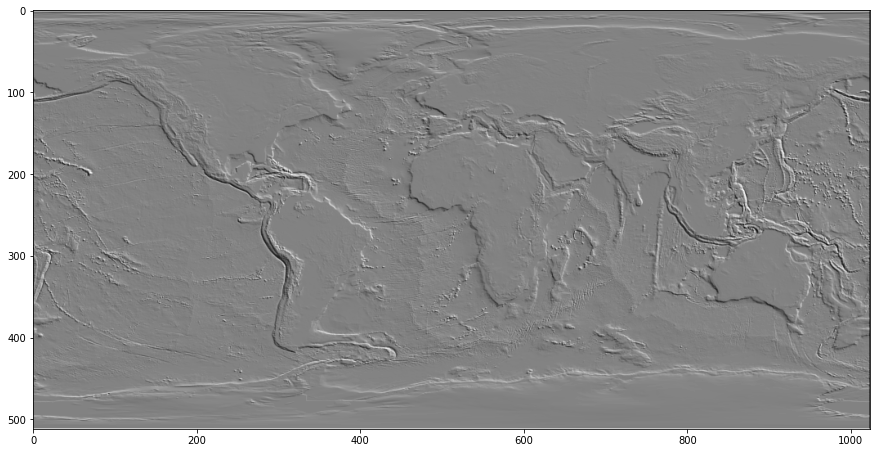

In [14]:
# Plot data as an image
plt.figure(figsize=(15,15))
plt.imshow(-I, cmap='gray')
plt.show()

In [15]:
data = loadtxt("ficha5_data3.txt")
data.shape

(663, 676)

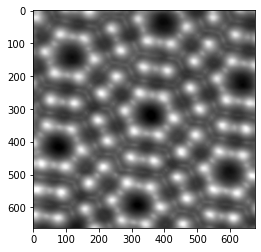

In [16]:
# Plot data as an image
plt.imshow(data, cmap='gray')
plt.show()

In [17]:
h = 2.5
phi = 3*np.pi/4

gradient_x = np.ones(data.shape)
for i in range(len(data)-1):
    gradient_x[i,:] = (data[i+1,:] - data[i])/h

gradient_y = np.ones(data.shape)
for i in range(len(data[0])-1):
    gradient_y[:,i] = (data[:,i+1] - data[:,i])/h

In [18]:
I = (np.cos(phi)*gradient_x + np.sin(phi)*gradient_y) / np.sqrt(gradient_x**2  + gradient_y**2 +1)

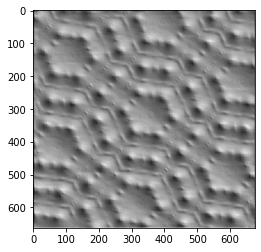

In [19]:
# Plot data as an image
# plt.figure(figsize=(10,10))
plt.imshow(-I, cmap='gray')
plt.show()

## Ex 5

**Retangulos**

In [20]:
from numpy import sin, exp
from scipy import integrate

def integral_rectangle(f, a, b, n):
    # f - func
    # a e b - limites
    # n - numero de subintervalos
    h = (b-a)/n
    retorno = 0
    for i in range(n):
        retorno += f(a+i*h)
    # Temos as "Alturas" dos retangulos
    # todas em retorno, basta agora multiplicar
    # pelo seu comprimento.
    retorno *= h
    return retorno

print("SIN(X)")
print("Função definida:", integral_rectangle(sin, 0, np.pi, 100))
print("Função scipy:", integrate.quad(sin, 0, np.pi)[0])
print("Desvio:", abs(integrate.quad(sin, 0, np.pi)[0] - integral_rectangle(sin, 0, np.pi, 100)))
print("\nEXP")
print("Função definida:", integral_rectangle(exp, 0, 2.5, 100))
print("Função scipy:", integrate.quad(exp, 0, 2.5)[0])
print("Desvio:", abs(integrate.quad(exp, 0, 2.5)[0] - integral_rectangle(exp, 0, 2.5, 100)))

SIN(X)
Função definida: 1.9998355038874436
Função scipy: 2.0
Desvio: 0.0001644961125564226

EXP
Função definida: 11.043295201688332
Função scipy: 11.182493960703471
Desvio: 0.13919875901513912


**Trapézio**

In [21]:
def integrate_trapezoid(f, a, b, n):
    # f - func
    # a e b - limites
    # n - numero de subintervalos

    h = (b-a)/n
    retorno = 0
    for i in range(n):
        # Altura Retangulo
        retorno += f(a+i*h)

        # Altura Trapézio
        retorno += f(a+i*h) - f(a+(i-1)*h)
    retorno *= h

    return retorno

print("SIN(X)")
print("Função definida:", integrate_trapezoid(sin, 0, np.pi, 100))
print("Função scipy:", integrate.quad(sin, 0, np.pi)[0])
print("Desvio:", integrate_trapezoid(sin, 0, np.pi, 100) - integrate.quad(sin, 0, np.pi)[0])
print("\nEXP")
print("Função definida:", integrate_trapezoid(exp, 0, 2.5, 100))
print("Função scipy:", integrate.quad(exp, 0, 2.5)[0])
print("Desvio:", integrate_trapezoid(exp, 0, 2.5, 100) - integrate.quad(exp, 0, 2.5)[0])

SIN(X)
Função definida: 2.0018091000867138
Função scipy: 2.0
Desvio: 0.0018091000867137552

EXP
Função definida: 11.315955131715105
Função scipy: 11.182493960703471
Desvio: 0.1334611710116338


**Simpson**

In [22]:
def integrate_simpson(f, a0, b0, n):
    # f - func
    # a e b - limites
    # n - numero de subintervalos

    h = (b0-a0)/n
    retorno = 0
    for i in range(0, n, 2):
        # Altura Retangulo
        # a e b são os extremos do retangulo
        a = a0+i*h
        b = a0+(i+1)*h
        
        # Formula de simpson
        retorno += f(a) + 4*f((a+b)/2) + f(b)


    return h/3 * retorno # Divido por 3 em vez de 6 pois ando de 2 em 2 (ver range)

In [23]:
print("SIN(X)")
print("Função definida:", integrate_simpson(sin, 0, np.pi, 100))
print("Função scipy:", integrate.quad(sin, 0, np.pi)[0])
print("Desvio:", abs(integrate_simpson(sin, 0, np.pi, 100) - integrate.quad(sin, 0, np.pi)[0]))
print("\nEXP")
print("Função definida:", integrate_simpson(exp, 0, 2.5, 100))
print("Função scipy:", integrate.quad(exp, 0, 2.5)[0])
print("Desvio:", abs(integrate_simpson(exp, 0, 2.5, 100) - integrate.quad(exp, 0, 2.5)[0]))


SIN(X)
Função definida: 2.000000000676472
Função scipy: 2.0
Desvio: 6.764722115804034e-10

EXP
Função definida: 11.042720067506934
Função scipy: 11.182493960703471
Desvio: 0.1397738931965371


## Ex 6

In [30]:
alpha = 90

def f(theta):
    return 1/sqrt(cos(theta)-cos(alpha))

In [34]:
integrate_simpson(f, 0, np.pi/2, 1000)

1.5668395576586638